# Detecting Mental Clues Remotely - Working Paper
by Ivan Liu, Fangyuan Liu, Qi Zhong, Shiguang Ni 

The following ipynb files explain and replicates all steps in the article.

In [1]:
#Commonly Used Packages
import os
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from matplotlib.colors import ListedColormap
import matplotlib as mpl
from scipy.stats import ttest_ind, ttest_rel, ttest_1samp

source_folder_path = '../resource/video/video_source/' 
target_folder_path = '../result/remote_ppg/'


## Remote PPG
### Feature point detection 

In [2]:
import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.remote_ppg import visualization as vis
feature = vis.Feature()

# face for demonstration
file_name = '../resource/image/Ivan.jpg'

#  Out of the 468 facial regions of interest (ROI) defined in MediaPipe (Google Inc), we chose 70 points away from the edges of the face and the lips.
landmarks_list = [3, 4, 5, 6, 8, 9, 10, 18, 32, 36, 43, 48, 50, 67, 69, 92, 101, 103, 104, 108, 109, 123, 134, 135, 142, 151, 164, 167, 182, 187, 192, 197, 201, 205, 206, 207, 210, 211, 212, 216, 248, 262, 266, 273, 278, 280, 297, 299, 322, 330, 332, 333, 337, 338, 352,  363, 364, 371, 393, 406, 411, 416, 421, 425, 426, 427, 430,431, 432, 436]

# Draw interactive graph.
fig = feature.get_face_with_feature_points(file_name,landmarks_list)
fig.show()

### Extract Remote PPG Signals to Beat Per Minute (BPM) Data

In [3]:
import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.remote_ppg import process as prc
v = prc.Video()

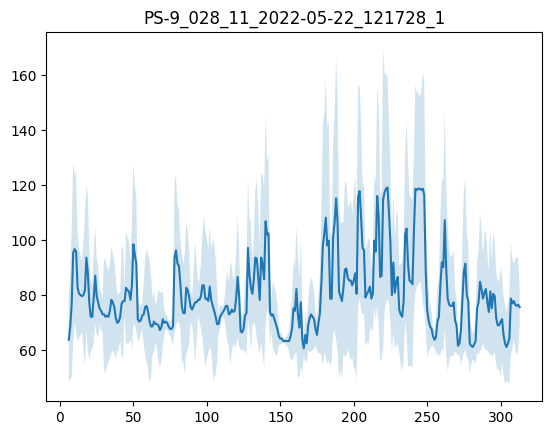

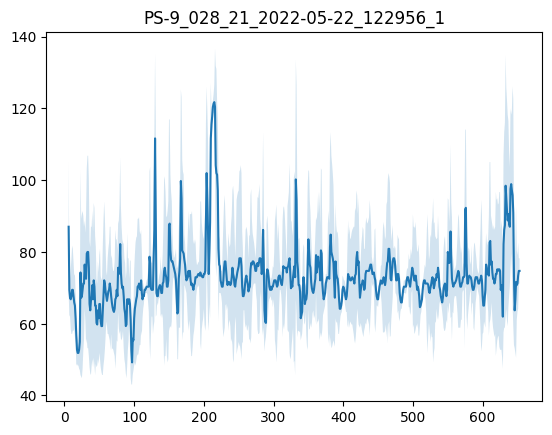

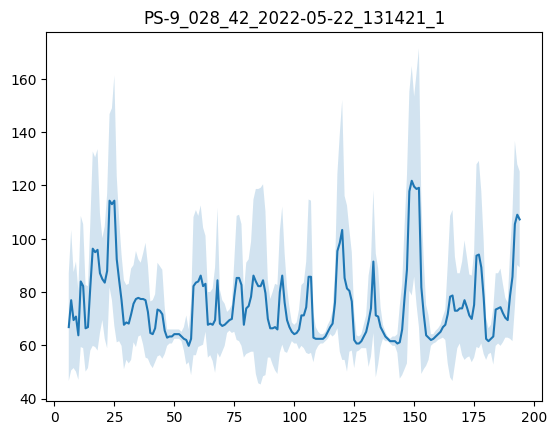

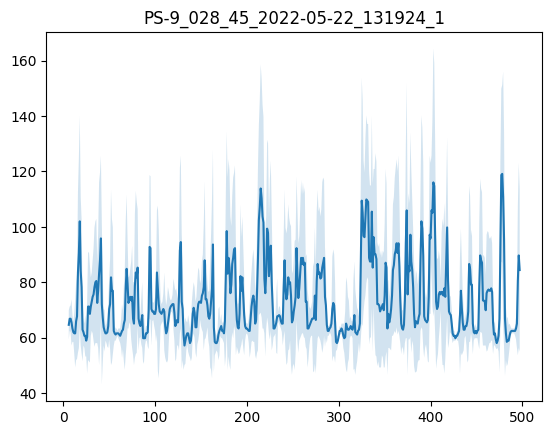

<Figure size 640x480 with 0 Axes>

In [4]:
# Extract features from films and convert them into beat per minute data.
# This step takes about 10 minutes for each 2-minute film
bpm_output_folder = v.convert_sig_to_bpm(source_folder_path, target_folder_path, landmarks_list)

# Show one of the BPM chart.
# bpm_output_folder

### Convert BPM data To HRV

In [5]:
from researchtoolbox.cardio import hrv as crv

BPM_folder_path = os.path.join(target_folder_path, "bpm_output")
result = crv.hrv().convert_bpm_to_hrv(BPM_folder_path)

### Data Cleaning

### Compare r-PPG to ECG

In [6]:
import sys
sys.path.insert(0, sys.path[0]+"/../")
from researchtoolbox.remote_ppg import visualization as vis
import os
ecg_file_path = '../resource/data/ECG/ECG_HRV.csv'
r_ppg_file_path = os.path.join("../result/remote_ppg/bpm_output","summary","result.csv")
column_names = ['HR','rMSSD','pNN50','SDNN','HF','LF']
compare = vis.Comparison()
compare.compare_two_data_source(ecg_file_path,r_ppg_file_path,column_names)


KeyError: 'HR'